## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Users\DELL\Downloads\computer+hardware\machine_data.txt", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [3]:
#adding column names in df
data.columns=['Vendor_Name','Model_Name','Machine_Cycle_Time','Memory_Min','Memory_Max',
              'Cache','Channel_Min','Channel_Max','PRP','ERP']
data.head()

# Machine_Cycle_Time: machine cycle time in nanoseconds
# Memory_Min: minimum main memory in kilobytes 
# Memory_Max: maximum main memory in kilobytes 
# Cache: cache memory in kilobytes 
# Channel_Min: minimum channels in units 
# Channel_Max: maximum channels in units 
# PRP: published relative performance 
# ERP: estimated relative performance 

,Vendor_Name,Model_Name,Machine_Cycle_Time,Memory_Min,Memory_Max,Cache,Channel_Min,Channel_Max,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [4]:
data.shape

(209, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Vendor_Name         209 non-null    object
 1   Model_Name          209 non-null    object
 2   Machine_Cycle_Time  209 non-null    int64 
 3   Memory_Min          209 non-null    int64 
 4   Memory_Max          209 non-null    int64 
 5   Cache               209 non-null    int64 
 6   Channel_Min         209 non-null    int64 
 7   Channel_Max         209 non-null    int64 
 8   PRP                 209 non-null    int64 
 9   ERP                 209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [6]:
data.describe()

,Machine_Cycle_Time,Memory_Min,Memory_Max,Cache,Channel_Min,Channel_Max,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


## Missing Values

In [7]:
data.isnull().sum()

Vendor_Name           0
Model_Name            0
Machine_Cycle_Time    0
Memory_Min            0
Memory_Max            0
Cache                 0
Channel_Min           0
Channel_Max           0
PRP                   0
ERP                   0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
for i in data.columns:
    print({i:data[i].unique()})

{'Vendor_Name': array(['adviser', 'amdahl', 'apollo', 'basf', 'bti', 'burroughs', 'c.r.d',
       'cdc', 'cambex', 'dec', 'dg', 'formation', 'four-phase', 'gould',
       'hp', 'harris', 'honeywell', 'ibm', 'ipl', 'magnuson', 'microdata',
       'nas', 'ncr', 'nixdorf', 'perkin-elmer', 'prime', 'siemens',
       'sperry', 'sratus', 'wang'], dtype=object)}
{'Model_Name': array(['32/60', '470v/7', '470v/7a', '470v/7b', '470v/7c', '470v/b',
       '580-5840', '580-5850', '580-5860', '580-5880', 'dn320', 'dn420',
       '7/65', '7/68', '5000', '8000', 'b1955', 'b2900', 'b2925', 'b4955',
       'b5900', 'b5920', 'b6900', 'b6925', '68/10-80', 'universe:2203t',
       'universe:68', 'universe:68/05', 'universe:68/137',
       'universe:68/37', 'cyber:170/750', 'cyber:170/760',
       'cyber:170/815', 'cyber:170/825', 'cyber:170/835', 'cyber:170/845',
       'omega:480-i', 'omega:480-ii', 'omega:480-iii', '1636-1',
       '1636-10', '1641-1', '1641-11', '1651-1', 'decsys:10:1091',
       'decs

## Feature Selection

In [10]:
data.drop('Vendor_Name',axis=1, inplace=True)

In [11]:
#converting from categorical to numerical
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for i in data.columns:
    data[i]=le.fit_transform(data[i])

data.head()

,Model_Name,Machine_Cycle_Time,Memory_Min,Memory_Max,Cache,Channel_Min,Channel_Max,PRP,ERP
0,29,31,4,12,21,10,29,90,82
1,62,4,22,21,11,8,21,98,85
2,63,4,22,21,11,8,21,94,85
3,64,4,22,21,11,8,21,85,85
4,65,4,22,18,11,8,14,76,69


In [12]:
data.shape

(209, 9)

## Check Assumption
Linear Regression is a Parametric algorithm which means before using Linear Regression we have to check few assumpttions if those assumtions are true then only we can use Linear Regression, other wise use other algorithms.

<AxesSubplot:>

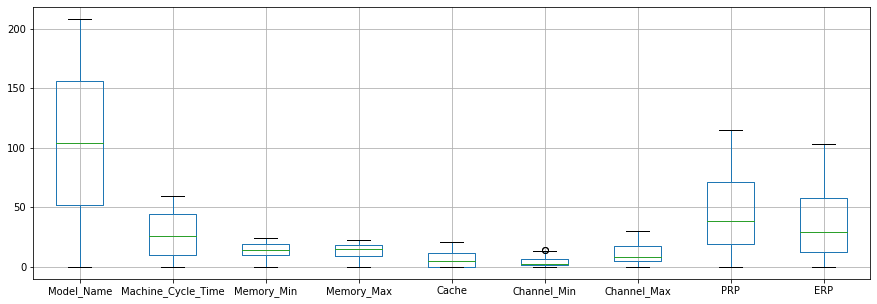

In [13]:
# Assumption 1 -> Their should be no outliers in the data
plt.figure (figsize= (15,5)) 
data.boxplot()

**Observation:** In data frame we have all the varaibles in continous numeric values so we create box plot on all columns by this plot we can se there is no outlier but channel_min has outliers.

**Note: If their are outlier present then we can treat using below approch**

1. Elimination: Directly droping the variable
2. Treat the outlier:
    a. Using Caping and Floaring Approch
    b. Replace Using Measure of Central Tendencies 
    c. Replace Custom values
3. If cluster is present then leave them as it is
4. Check with Client if this is acceptable range or not

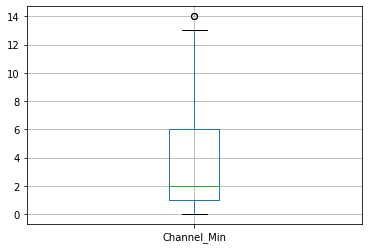

In [14]:
data.boxplot(column='Channel_Min');

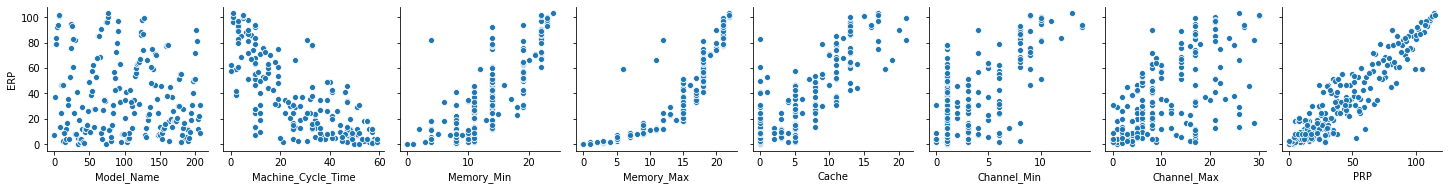

In [15]:
# Assumption 2 -> Assumption of linearity: Every independet variable should have a linear relationship with the dependent variable.
sns.pairplot(data,x_vars=['Model_Name','Machine_Cycle_Time','Memory_Min','Memory_Max',
              'Cache','Channel_Min','Channel_Max','PRP'], y_vars=['ERP'], kind='scatter');     
plt.show();

**Observation:** If the assumption of Linearity is not met then we can drop that variable.

1. No Relation in Model_Name, Channel_Min, Channel_Max and ERP 
2. Moderately Negative Linear Relationship in Machine_Cycle_Time and ERP
3. Moderately Positive Linear Relationship in Memory_Min, Cache and ERP
4. Strong Positive Linear Relationship in Memory_Max, PRP and ERP

In [16]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]
y=y.astype(int)

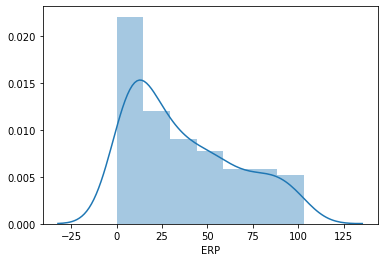

In [17]:
# Assumption 3 -> Asumption of Normality: The dependet variable should follow an approximate normal Distribution
sns.distplot(y);

**Observation:**
ERP variable is not meeting the assumption and we can see that y variable is right skewed and not following proper normal Distribution

**Note: If its not normal or if its skewed plot then we can transform the column in different transformation**
1. Log Transform : Most of the time we prefer log transform, because it will help you to smoothing of curve
2. SQRT Transform: In sqrt transform we can see the peeks and sometime it will not help you to smoothing of curve

<AxesSubplot:xlabel='ERP'>

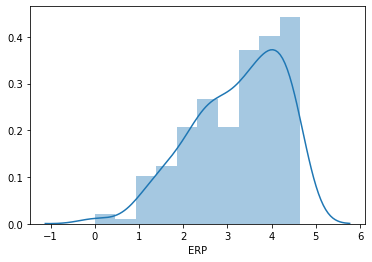

In [18]:
y_log = np.log1p(y)
sns.distplot(y_log)

**Observation:** If your data is approximate normal then dont do transform because you will get skewed data. In our case we will go ahead with y values intead of taking y_log values.

**Note: For good practive make sure that your X variables does not contain high skewness and if its approximately normal then its good.**

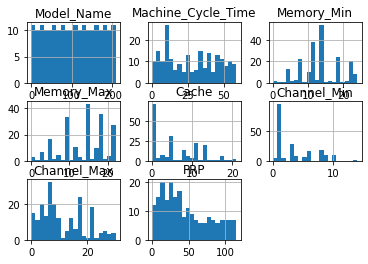

In [19]:
# check hist for all variables
x.hist(bins=20);

**Observation:** From above histograms we can clearly see PRP and Channel_Min is slightly right skewed.

In [20]:
#checking for skewness of all x variables 
from scipy.stats import skew

data_num_skew = x.apply(lambda i: skew(i.dropna()))

data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]
 
print(data_num_skew)
print(data_num_skewed)

import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
x[data_num_skewed.index] = np.log1p(x[data_num_skewed.index])

Model_Name            0.000000
Machine_Cycle_Time    0.140518
Memory_Min            0.062312
Memory_Max           -0.422192
Cache                 0.518526
Channel_Min           0.993033
Channel_Max           0.614843
PRP                   0.569363
dtype: float64
Channel_Min    0.993033
dtype: float64


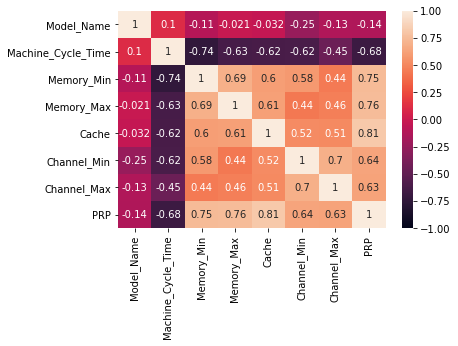

In [21]:
# Assumption 4 -> Assumption of no multicollinearity: There should be No multicolinearity in the Data. 
#Multicolinearity is problem where one variable is dependent on other, 
#we want dependecy between x and y variable but not in the x variables, 
#so if x variables are depend on each other then the model will not be good.
#To check the multicolinearity we can use the pearson correlation or VIF value

corr_df=x.corr(method="pearson")
#print(corr_df)
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

**Observation:** We want value close to 0 which means their is no correlated with each other.

**Note: If the correlation is high between two variables then drop one beacuse bothe varible carrying the similar information so eliminate the varible but think logically.**

**Check for VIF value:** Sometimes the correlation matrix alone will not help you to check the multicolinearity so you can use VIF

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame()
vif_df["features"] = x.columns
vif_df["VIF Factor"] = [vif(x.values, i) for i in range(x.shape[1])]  
vif_df.round(2)

,features,VIF Factor
0,Model_Name,4.01
1,Machine_Cycle_Time,2.84
2,Memory_Min,17.30
3,Memory_Max,16.47
4,Cache,6.66
5,Channel_Min,10.62
6,Channel_Max,6.82
7,PRP,17.92


**Observation:** VIF value Less than 5 is good Which represent no multicolinearity

**Note:** Once you eliminate one variable based on VIF score then other variable's VIF also change and it will decrease so never eliminate all variables at once, so remove variables with highest value and then run the function again. Also use domain knowledge don’t just depend on VIF values.

In [23]:
#categorical to numerical 
colname=data.columns
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for x in colname:
    data[x]=le.fit_transform(data[x])

In [24]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]
y=y.astype(int)

In [25]:
#scalling
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(x)
x=scaler.transform(x)

In [26]:
#spliting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=10)

# > 1000 --> TEST SIZE = 0.3
# < 1000 --> TEST SIZE = 0.2

In [27]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(167, 8)
(167,)
(42, 8)
(42,)


In [28]:
#model building
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)  

#predicting model
y_pred = lm.predict(x_test)

from sklearn.metrics import r2_score,mean_squared_error

print("R-squared:", r2_score(y_test,y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print("Adj R-square:", 1 - (1-r2_score(y_test,y_pred))*(len(y)-1)/(len(y)-x.shape[1]-1))

R-squared: 0.9483373050424612
RMSE: 6.526045745762888
Adj R-square: 0.9462707972441596


In [32]:
print(data.ERP.min())
print(data.ERP.max())

0
103


**Observation:** R-square value tells you how much variablity you can explaoin in the data with the help of regression equation. You will get value in the range of 0 to 1 so close to 1 means good model and close to 0 means worst model (sometimes you will get value less than 0 also)

## Ridge Regression

In [33]:
from sklearn.linear_model import Ridge

rid = Ridge()
rid.fit(x_train, y_train)  

# print intercept and coefficients for Ridge regression 
print(rid.intercept_)
print(rid.coef_)

36.9553143729822
[-0.53400938 -1.56338395  1.98006993 10.63520039  6.2212767   3.65087212
  0.57366801  8.54493491]


In [35]:
y_pred = rid.predict(x_test)

print("R-squared:", r2_score(y_test,y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print("Adj R-square:", 1 - (1-r2_score(y_test,y_pred))*(len(y)-1)/(len(y)-x.shape[1]-1))

R-squared: 0.9483231680045958
RMSE: 6.526938581931201
Adj R-square: 0.9462560947247797


## Lasso Regression

In [36]:
from sklearn.linear_model import Lasso

las = Lasso()
las.fit(x_train, y_train)  

print(las.intercept_)
print(las.coef_)

37.003482000722045
[-0.         -1.15505507  1.52551421 10.31833861  5.63238582  3.58511012
  0.          9.39356966]


In [37]:
y_pred = rid.predict(x_test)

print("R-squared:", r2_score(y_test,y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print("Adj R-square:", 1 - (1-r2_score(y_test,y_pred))*(len(y)-1)/(len(y)-x.shape[1]-1))

R-squared: 0.9483231680045958
RMSE: 6.526938581931201
Adj R-square: 0.9462560947247797
